# Assignment Number 3
----------------
**This notebook includes following things:**

**1) Project 2 (Admission dataset) - Implemented classification models (Decision Trees , SVM ,KNN, Naive Bayes , Logistic Regression)**

**2) Project 4(Admission Dataset) - Implemented Artificial Neural Network**

**3) Project 3(Churn Modelling) - Implemented classification models (Decision Trees , SVM ,KNN, Naive Bayes , Logistic Regression,**
**Artificial Neural Network**)

---------------------------------


# PROJECT 02 

## PART B)]Classification using a Admission Prediction dataset 
## Implement all classification models

Dataset - This dataset is inspired by the UCLA Graduate Dataset.
Features -

Standardized Tests:

a.GREscores : out of 340

b.TOEFLscores :out of 120

c.University rating.(1 to 5)

d.Statement of purposestrength.(1 to 5)

e.Letter of recommendation strength.(1 to 5)

f.Undergraduate GPA-out of 10 (5 to 10)Binary variable. (Categorical)

g.Research experience -either 0 or 1, where 0 is no experience and 1 is some experience.

Target Variable

h.Chance of admit –continuous attribute between 0 and 1 representing the probability of admission.

## Import Required Libraries and Read Data CSV 

In [0]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import graphviz

import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn import tree
import seaborn as sns
%matplotlib inline
from sklearn import metrics
import keras
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout

Using TensorFlow backend.


In [0]:
# Reindex with indexes that do not have spaces
indx = ['SerialNo', 'GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research', 'Admit_Chance']
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv')
df.columns = indx

df.head()

,SerialNo,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Function Definitions

In [0]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
    df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
    
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    

# Classification

## Data Preprocessing

In [0]:
df.dtypes

SerialNo          int64
GRE               int64
TOEFL             int64
U_Rate            int64
SOP             float64
LOR             float64
CGPA            float64
Research          int64
Admit_Chance    float64
dtype: object

In [0]:
df.shape

(500, 9)

## Create Working Copy of Data and Preprocess

In [0]:
data = df.copy()

## Drop Serial No. 

In [0]:
data = data.drop(['SerialNo'],axis=1)
data.dtypes

GRE               int64
TOEFL             int64
U_Rate            int64
SOP             float64
LOR             float64
CGPA            float64
Research          int64
Admit_Chance    float64
dtype: object

In [0]:
data.shape

(500, 8)

## Check for duplicates

In [0]:
print("the number of duplicates is %d" % (data.duplicated().sum()) )

the number of duplicates is 0


## Remove Outliers

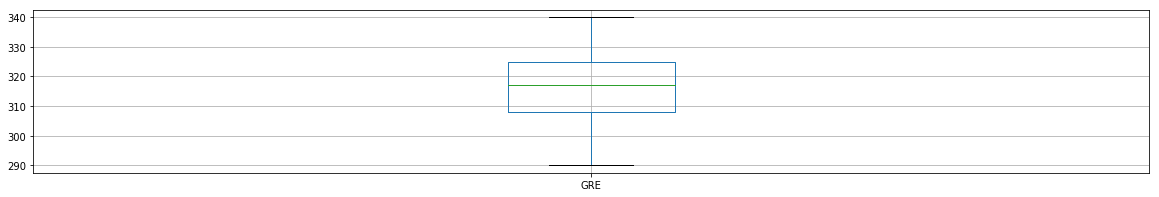

In [0]:
%matplotlib inline
data[["GRE"]].boxplot(figsize=(20,3))

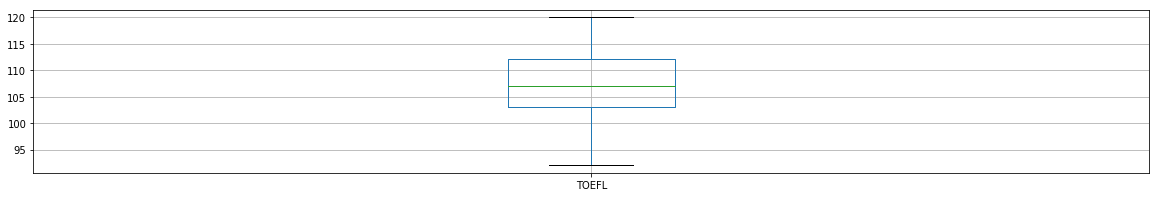

In [0]:
data[["TOEFL"]].boxplot(figsize=(20,3))

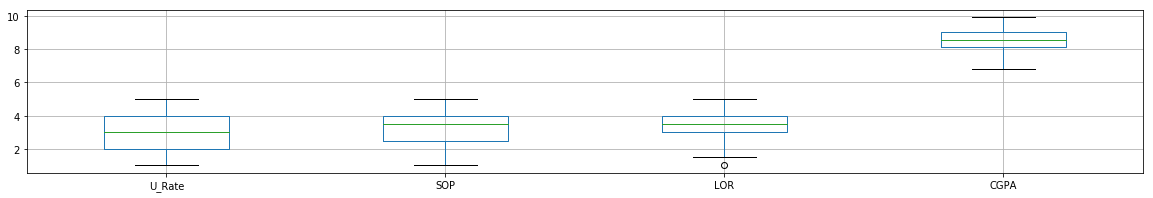

In [0]:
data[['U_Rate', 'SOP', 'LOR', 'CGPA']].boxplot(figsize=(20,3))

In [0]:
#Remove oputliers to see if improves prediction
data.min()

GRE             290.00
TOEFL            92.00
U_Rate            1.00
SOP               1.00
LOR               1.00
CGPA              6.80
Research          0.00
Admit_Chance      0.34
dtype: float64

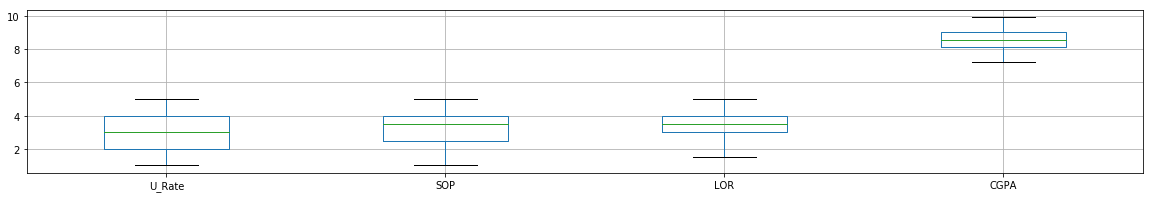

In [0]:
data = data[data["LOR"]>1.]
data = data[data["Admit_Chance"] > 0.36]
data[['U_Rate', 'SOP', 'LOR', 'CGPA']].copy().boxplot(figsize=(20,3))

In [0]:
data.min()

GRE             290.00
TOEFL            92.00
U_Rate            1.00
SOP               1.00
LOR               1.50
CGPA              7.20
Research          0.00
Admit_Chance      0.37
dtype: float64

In [0]:
classify = data.copy()

In [0]:
classify.shape

(495, 8)

In [0]:
classify.columns

Index(['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research',
       'Admit_Chance'],
      dtype='object')

## Data visualization for better understanding of distribution

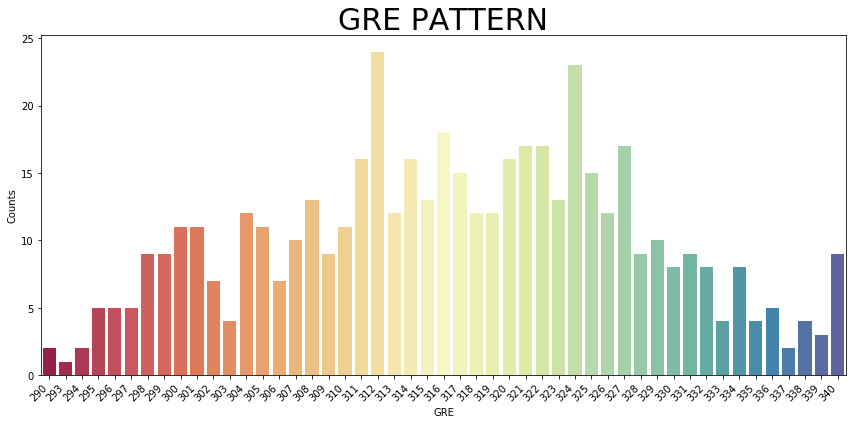

In [0]:
plt.figure(figsize=(12,6))
plt.title('GRE PATTERN',fontdict={'fontsize':'30'})
ax = sns.countplot(x='GRE',data=classify,palette='Spectral')
ax.set(xlabel='GRE', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

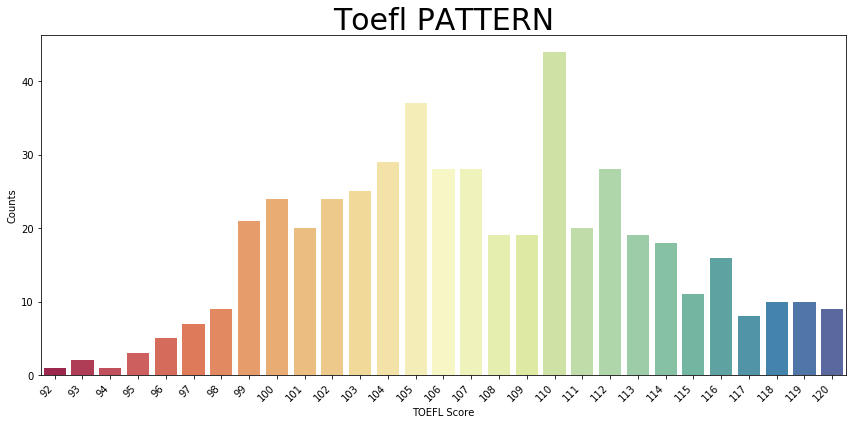

In [0]:
plt.figure(figsize=(12,6))
plt.title('Toefl PATTERN',fontdict={'fontsize':'30'})
ax = sns.countplot(x='TOEFL',data=classify,palette='Spectral')
ax.set(xlabel='TOEFL Score', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

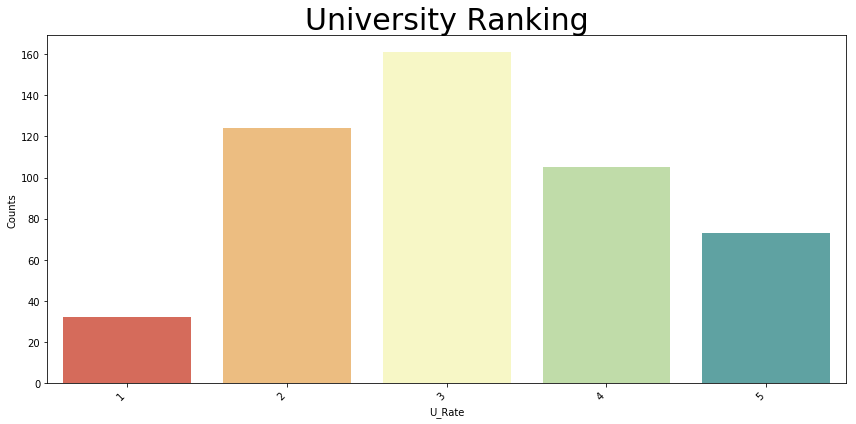

In [0]:
plt.figure(figsize=(12,6))
plt.title('University Ranking',fontdict={'fontsize':'30'})
ax = sns.countplot(x='U_Rate',data=classify,palette='Spectral')
ax.set(xlabel='U_Rate', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

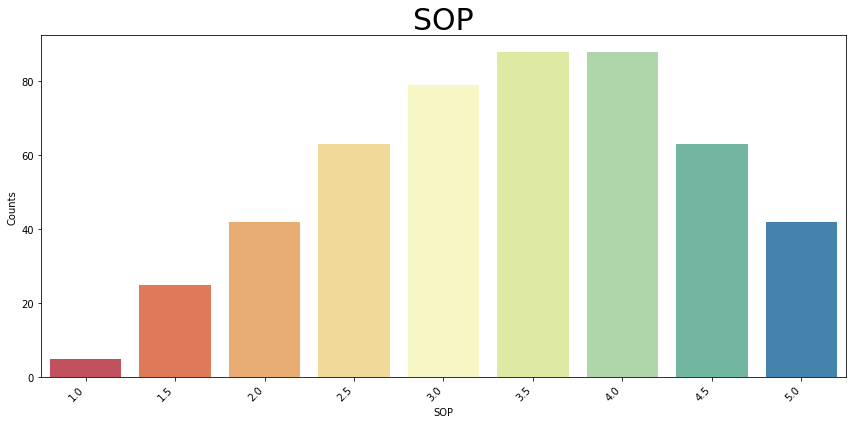

In [0]:
plt.figure(figsize=(12,6))
plt.title('SOP',fontdict={'fontsize':'30'})
ax = sns.countplot(x='SOP',data=classify,palette='Spectral')
ax.set(xlabel='SOP', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

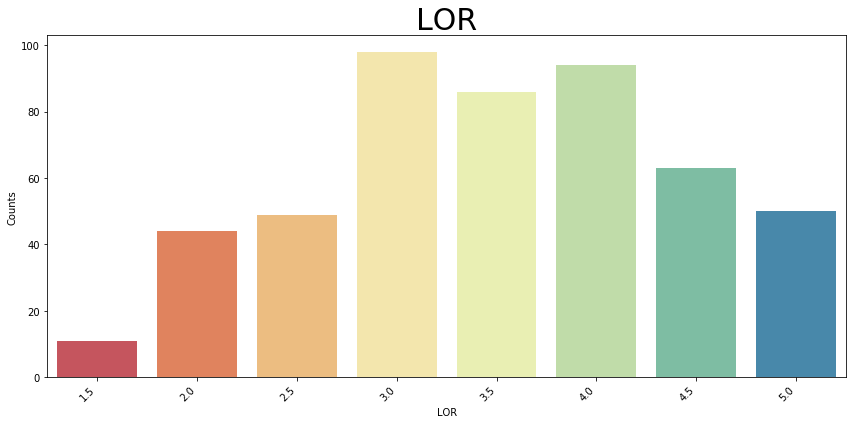

In [0]:
plt.figure(figsize=(12,6))
plt.title('LOR',fontdict={'fontsize':'30'})
ax = sns.countplot(x='LOR',data=classify,palette='Spectral')
ax.set(xlabel='LOR', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [0]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

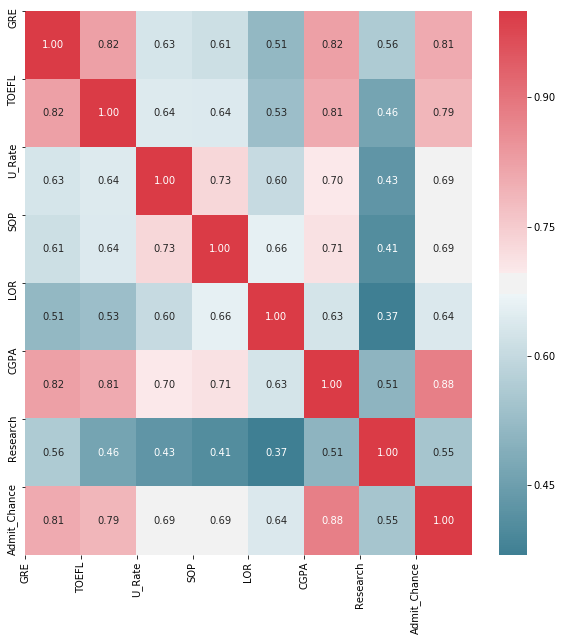

In [0]:
heatMap(classify)

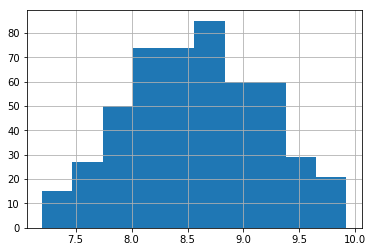

In [0]:
classify.CGPA.hist()

In [0]:
classify.dtypes

GRE               int64
TOEFL             int64
U_Rate            int64
SOP             float64
LOR             float64
CGPA            float64
Research          int64
Admit_Chance    float64
dtype: object

In [0]:
classify.min(axis = 0, skipna = True)

GRE             290.00
TOEFL            92.00
U_Rate            1.00
SOP               1.00
LOR               1.50
CGPA              7.20
Research          0.00
Admit_Chance      0.37
dtype: float64

In [0]:
classify.max(axis = 0, skipna = True)

GRE             340.00
TOEFL           120.00
U_Rate            5.00
SOP               5.00
LOR               5.00
CGPA              9.92
Research          1.00
Admit_Chance      0.97
dtype: float64

## Dicretization Chance of Admit into three classes

In [0]:
data1 = pd.cut(classify['Admit_Chance'],3)
data1.value_counts(sort=False)

(0.369, 0.57]     75
(0.57, 0.77]     234
(0.77, 0.97]     186
Name: Admit_Chance, dtype: int64

In [0]:
data2 = classify.copy()

In [0]:
def Admit(row):
    if (row['Admit_Chance'] >= 0.33 and row['Admit_Chance']<0.55):
        val = 0
    elif (row['Admit_Chance'] >= 0.55 and row['Admit_Chance']<0.76):
        val = 1
    else:
        val = 2
    return val

In [0]:
data2['Admit'] = data2.apply(Admit, axis=1)

In [0]:
data2.head()

,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,2
1,324,107,4,4.0,4.5,8.87,1,0.76,2
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,2
4,314,103,2,2.0,3.0,8.21,0,0.65,1


In [0]:
data2.tail()

,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance,Admit
495,332,108,5,4.5,4.0,9.02,1,0.87,2
496,337,117,5,5.0,5.0,9.87,1,0.96,2
497,330,120,5,4.5,5.0,9.56,1,0.93,2
498,312,103,4,4.0,5.0,8.43,0,0.73,1
499,327,113,4,4.5,4.5,9.04,0,0.84,2


## Create train and test data

In [0]:
data2.columns

Index(['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research',
       'Admit_Chance', 'Admit'],
      dtype='object')

In [0]:
data2 = data2.drop('Admit_Chance',axis=1)

In [0]:
df_input = data2[['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research']]

In [0]:
df_output = data2['Admit']

In [0]:
df_input.shape

(495, 7)

In [0]:
df_output.shape

(495,)

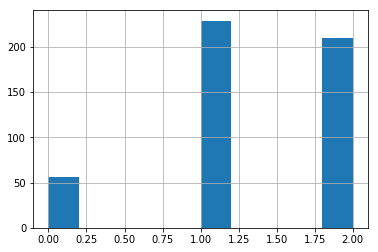

In [0]:
data2['Admit'].hist()

In [0]:
x = df_input.values
y = df_output.values
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [0]:
x_train.shape

(396, 7)

In [0]:
y_test.shape

(99,)

# Decision Tree Classifier

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(x_train, y_train)

In [0]:
pred = clf.predict(x_test)

In [0]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, pred,average='micro'))
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
score1 = metrics.precision_score(y_test,pred, average= "micro")
print("Precision score: {}".format(score1))
score2 = metrics.recall_score(y_test,pred, average= "micro")
print("Recall score: {}".format(score2))

Evaluating with F1 score metric: 0.72
Accuracy score: 0.7171717171717171
Precision score: 0.7171717171717171
Recall score: 0.7171717171717171


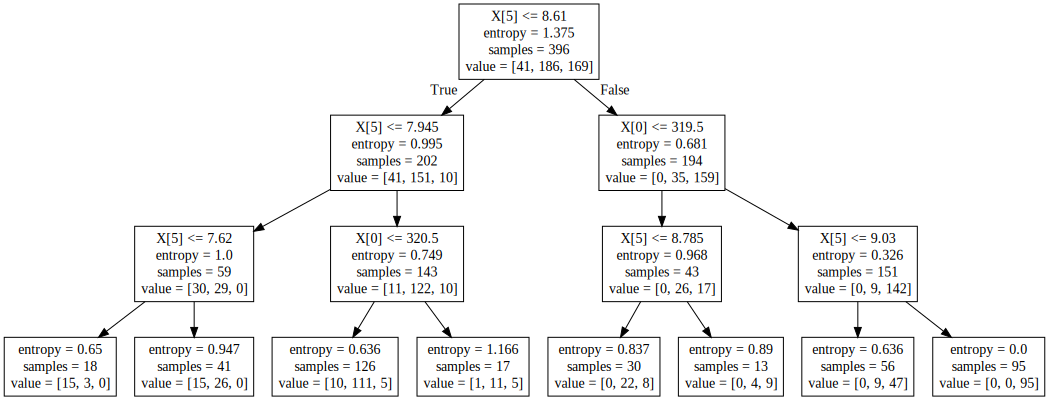

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graphviz.Source(dot_data) 

In [0]:
# Create copy to perform classification methods to
to_classify = data.copy()

In [0]:
# Sort by classification column
to_classify.sort_values(by=['Admit_Chance'], inplace=True)

In [0]:

# Create ordinal values based on classification column percentages
to_classify["Class"] = 0


In [0]:
to_classify.loc[(to_classify.Admit_Chance > 0.67), 'Class'] = 1
to_classify.loc[(to_classify.Admit_Chance > 0.79), 'Class'] = 2


In [0]:
# drop classification column
to_classify = to_classify.drop(["Admit_Chance"], axis=1)
to_classify[to_classify["Class"] == 0].count()

GRE         173
TOEFL       173
U_Rate      173
SOP         173
LOR         173
CGPA        173
Research    173
Class       173
dtype: int64

In [0]:
to_classify.shape

(495, 8)

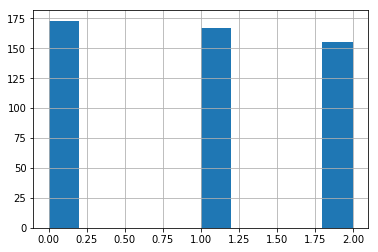

In [0]:
to_classify['Class'].hist()

## Desicion tree classifier on balanced dataset

In [0]:
def toSingleCol(awry, names):
    to_rtrn = []
    for i in range(0, len(awry)):
        found = False
        j = 0
        while(not found and j < len(awry[i])):
            found = awry[i][j] == 1
            if(not found):
                j += 1   
        to_rtrn.append(names[j])
    return to_rtrn
        

x2,y2 = to_xy(to_classify,"Class")

# Split into train/test
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.20, random_state=42)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

X = pd.DataFrame(x_train2, columns=['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research'])
Y = toSingleCol(y_train2, ['Unlikely', 'Probable', 'Likely'])
to_f1 = toSingleCol(y_test2, ['Unlikely', 'Probable', 'Likely'])

clf = clf.fit(X, Y)
pred = clf.predict(x_test2)


print('Evaluating with F1 score metric: %.2f' % f1_score(to_f1, pred,average='micro'))
score = metrics.accuracy_score(to_f1, pred)
print("Accuracy score: % {}".format(score))
score1 = metrics.precision_score(to_f1, pred, average= "micro")
print("Precision score: {}".format(score1))
score2 = metrics.recall_score(to_f1, pred, average= "micro")
print("Recall score: {}".format(score2))

Evaluating with F1 score metric: 0.83
Accuracy score: % 0.8282828282828283
Precision score: 0.8282828282828283
Recall score: 0.8282828282828283


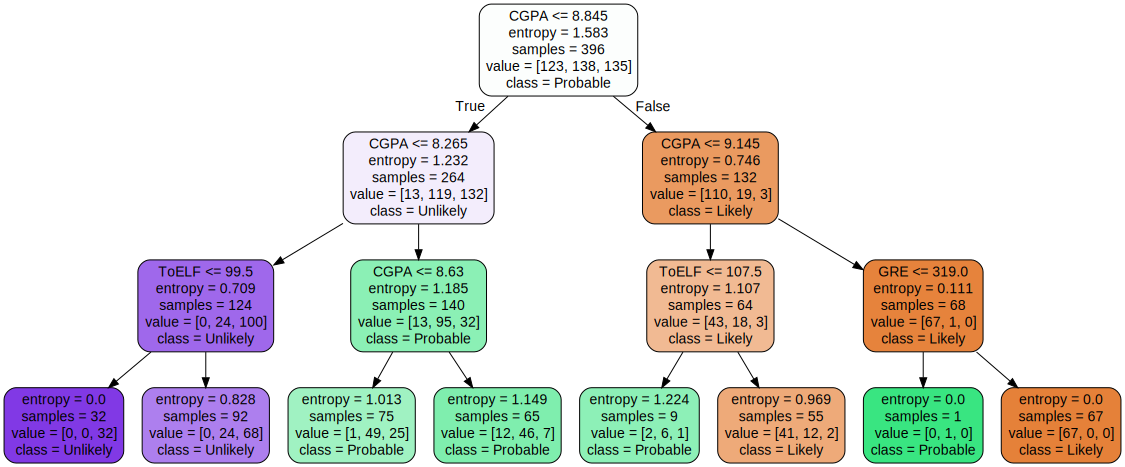

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names = ['GRE', 'ToELF', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research'],
                                class_names = ['Likely', 'Probable', 'Unlikely'],
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

## Create data to predict from and compare prediction

In [0]:
def outClassToCGPA(col, awry):
    print("%3s%5s%10s" % ("","CGPA", "Predicted"))
    print("____________________")
    for i in range(0, len(awry)):
        print("%d   %1.2f%10s" % (i,col[i],awry[i]))
    
createData = [
              [280, 105, 2, 2.0, 2.5, 7.75, 1, 'Unlikely'],
              [308, 107, 3, 3.5, 3.5, 8.10, 0, 'Probable'],
              [316, 109, 4, 4.0, 4.5, 8.60, 0, 'Probable'],
              [305, 108, 4, 3.0, 3.0, 8.25, 1, 'Unlikely'],
              [308, 111, 2, 4.0, 4.0, 8.62, 0, 'Probable'],
              [315, 112, 2, 3.0, 3.0, 8.76, 1, 'Likely'],
              [330, 115, 4, 4.5, 4.5, 9.18, 1, 'Likely']]

createData = pd.DataFrame(createData, columns=to_classify.columns)
testY = pd.DataFrame(createData, columns=['Class'])
testX = createData.drop(['Class'], axis=1)

predY = clf.predict(testX)
outClassToCGPA(createData.CGPA, predY)

    CGPA Predicted
____________________
0   7.75  Unlikely
1   8.10  Unlikely
2   8.60  Probable
3   8.25  Unlikely
4   8.62  Probable
5   8.76  Probable
6   9.18    Likely


# Logistic Regression


Evaluating with F1 score metric: 0.76

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed


Accuracy score: % 0.7575757575757576
Precision score: 0.7575757575757576
Recall score: 0.7575757575757576


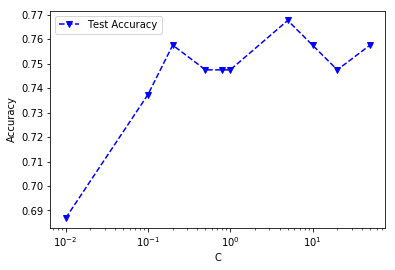

In [0]:
C=[0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

LRtestAcc = []

for param in C:
    clf = LogisticRegression(C=param)
    clf.fit(x_train,y_train)
    log_reg_pred = clf.predict(x_test)
#     print(log_reg_pred)
    LRtestAcc.append(accuracy_score(y_test, log_reg_pred))

print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, log_reg_pred,average='micro'))
score = metrics.accuracy_score(y_test, log_reg_pred)
print("Accuracy score: % {}".format(score))
score1 = metrics.precision_score(y_test, log_reg_pred, average= "micro")
print("Precision score: {}".format(score1))
score2 = metrics.recall_score(y_test, log_reg_pred, average= "micro")
print("Recall score: {}".format(score2))

plt.plot(C, LRtestAcc, 'bv--')
plt.legend(['Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')

# Naive Bayes Classifier

In [0]:
clf_NB = GaussianNB()
clf_NB.fit(x_train,y_train)
NB_pred = clf_NB.predict(x_test)
print("Accuracy on test data is %.2f" % (accuracy_score(y_test, NB_pred)))
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, NB_pred,average='micro'))
score = metrics.accuracy_score(y_test, NB_pred)
print("Accuracy score: % {}".format(score))
score1 = metrics.precision_score(y_test, NB_pred, average= "micro")
print("Precision score: {}".format(score1))
score2 = metrics.recall_score(y_test, NB_pred, average= "micro")
print("Recall score: {}".format(score2))

Accuracy on test data is 0.71
Evaluating with F1 score metric: 0.71
Accuracy score: % 0.7070707070707071
Precision score: 0.7070707070707071
Recall score: 0.7070707070707071


# Support Vector Machine Classifier 

Accuracy on test data is 0.76
Evaluating with F1 score metric: 0.76
Accuracy score: % 0.7575757575757576
Precision score: 0.7575757575757576
Recall score: 0.7575757575757576


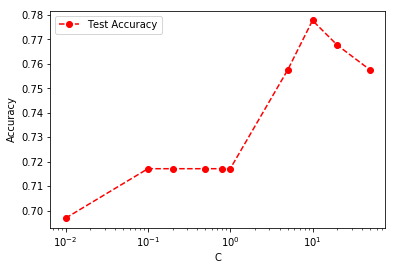

In [0]:
C=[0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]

SVMLtestAcc = []

for param in C:
    clf = SVC(C=param, kernel='linear')
    clf.fit(x_train,y_train)
    svml_pred = clf.predict(x_test)
#     print(svml_pred)
    SVMLtestAcc.append(accuracy_score(y_test, svml_pred))


print("Accuracy on test data is %.2f" % (accuracy_score(y_test, svml_pred)))
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, svml_pred,average='micro'))
score = metrics.accuracy_score(y_test, svml_pred)
print("Accuracy score: % {}".format(score))
score1 = metrics.precision_score(y_test, svml_pred, average= "micro")
print("Precision score: {}".format(score1))
score2 = metrics.recall_score(y_test, svml_pred, average= "micro")
print("Recall score: {}".format(score2))

plt.plot(C, SVMLtestAcc, 'ro--')
plt.legend(['Test Accuracy'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')

# K Nearest Neighbour

Evaluating with F1 score metric: 0.72
Accuracy score: % 0.7171717171717171
Precision score: 0.7171717171717171
Recall score: 0.7171717171717171


Text(0,0.5,'Accuracy')

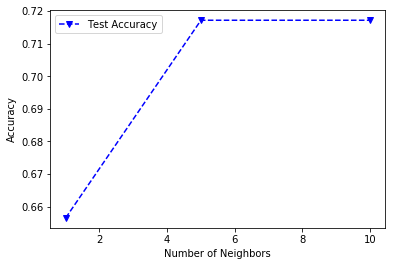

In [0]:
numNeighbors = [1,5,10]
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    knn_pred = clf.predict(x_test)
#     print(knn_pred)
    testAcc.append(accuracy_score(y_test, knn_pred))


print('Evaluating with F1 score metric: %.2f' % f1_score(y_test ,knn_pred,average='micro'))
score = metrics.accuracy_score(y_test, knn_pred)
print("Accuracy score: % {}".format(score))
score1 = metrics.precision_score(y_test, knn_pred, average= "micro")
print("Precision score: {}".format(score1))
score2 = metrics.recall_score(y_test, knn_pred, average= "micro")
print("Recall score: {}".format(score2))

plt.plot(numNeighbors, testAcc, 'bv--')
plt.legend(['Test Accuracy'])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

# Tesorflow classification

#### Dicretization Chance of Admit into three classes

In [0]:
new_data = pd.cut(classify['Admit_Chance'],2)
new_data.value_counts(sort=False)

(0.369, 0.67]    162
(0.67, 0.97]     333
Name: Admit_Chance, dtype: int64

In [0]:
data3 = classify.copy()

In [0]:
def Admit(row):
    if (row['Admit_Chance'] >= 0.33 and row['Admit_Chance']<0.67):
        val = 0
    else:
        val = 1
    return val

In [0]:
data3['Admit'] = data3.apply(Admit, axis=1)

In [0]:
data3.head()

,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [0]:
data3.tail()

,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance,Admit
495,332,108,5,4.5,4.0,9.02,1,0.87,1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,1
499,327,113,4,4.5,4.5,9.04,0,0.84,1


#### split data training and testing

In [0]:
data3.columns

Index(['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research',
       'Admit_Chance', 'Admit'],
      dtype='object')

In [0]:
data3 = data3.drop('Admit_Chance',axis=1)

In [0]:
df_input1 = data3[['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research']]

In [0]:
df_output1 = data3['Admit']

In [0]:
df_input1.shape

(495, 7)

In [0]:
df_output1.shape

(495,)

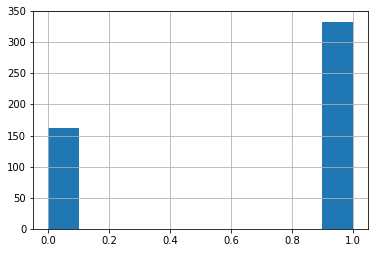

In [0]:
data3['Admit'].hist()

In [0]:
x = df_input1.values
y = df_output1.values
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [0]:
x_train.shape

(396, 7)

In [0]:
y_test.shape

(99,)

#### convert class to one hot format 

In [0]:
num_classes = 2
#Convert class vectors to one hot format
y_train_c = keras.utils.to_categorical(y_train,num_classes)
print(y_train_c[:1])
y_test_c = keras.utils.to_categorical(y_test,num_classes)
print(x_train.shape)
print(y_train_c.shape)

[[ 0.  1.]]
(396, 7)
(396, 2)


In [0]:
model_class = Sequential()
model_class.add(Dense(64, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
model_class.add(Dense(32, activation='relu')) # Hidden 2
model_class.add(Dense(16, activation='relu'))
model_class.add(Dense(y_train_c.shape[1], activation='softmax')) # Output
model_class.compile(optimizer = 'rmsprop' , loss = 'binary_crossentropy', metrics = ['accuracy'])
model_class.fit(x_train, y_train_c,validation_data=(x_test,y_test_c),verbose=2,epochs=100)
      

Train on 396 samples, validate on 99 samples
Epoch 1/100
 - 0s - loss: 4.0257 - acc: 0.5253 - val_loss: 0.7687 - val_acc: 0.6667
Epoch 2/100
 - 0s - loss: 1.2684 - acc: 0.6010 - val_loss: 2.3629 - val_acc: 0.6667
Epoch 3/100
 - 0s - loss: 1.1648 - acc: 0.5884 - val_loss: 1.4855 - val_acc: 0.6667
Epoch 4/100
 - 0s - loss: 1.6126 - acc: 0.5328 - val_loss: 0.6613 - val_acc: 0.6566
Epoch 5/100
 - 0s - loss: 1.5842 - acc: 0.5101 - val_loss: 0.6112 - val_acc: 0.6667
Epoch 6/100
 - 0s - loss: 0.9334 - acc: 0.5985 - val_loss: 1.9185 - val_acc: 0.6667
Epoch 7/100
 - 0s - loss: 1.0111 - acc: 0.6338 - val_loss: 0.6640 - val_acc: 0.6970
Epoch 8/100
 - 0s - loss: 1.0214 - acc: 0.5833 - val_loss: 1.4400 - val_acc: 0.3333
Epoch 9/100
 - 0s - loss: 1.0026 - acc: 0.5758 - val_loss: 1.4227 - val_acc: 0.6667
Epoch 10/100
 - 0s - loss: 1.1723 - acc: 0.5429 - val_loss: 0.5946 - val_acc: 0.7677
Epoch 11/100
 - 0s - loss: 1.0543 - acc: 0.5455 - val_loss: 0.7380 - val_acc: 0.3535
Epoch 12/100
 - 0s - loss: 0.

Epoch 97/100
 - 0s - loss: 0.5072 - acc: 0.7576 - val_loss: 0.5251 - val_acc: 0.6869
Epoch 98/100
 - 0s - loss: 0.4783 - acc: 0.7525 - val_loss: 0.4236 - val_acc: 0.7374
Epoch 99/100
 - 0s - loss: 0.4752 - acc: 0.7702 - val_loss: 0.4689 - val_acc: 0.7172
Epoch 100/100
 - 0s - loss: 0.5452 - acc: 0.6970 - val_loss: 0.4020 - val_acc: 0.8384


In [0]:
pred_c = model_class.predict(x_test)
pred_c = np.argmax(pred_c,axis=1) 

In [0]:
y_true= np.argmax(y_test_c,axis=1) 
score_c = metrics.accuracy_score(y_true, pred_c)
print("Accuracy score: {}".format(score_c))

score_tf_precision_stopping = metrics.precision_score(y_true, pred_c, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_true, pred_c, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_true, pred_c, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.8383838383838383
Precision score: 0.8385585585585584
Recall score: 0.8383838383838383
F1 score: 0.8318555008210181


# Project 3 - Classification Models
----------
### Models Implemented - Naive Bayes , K Nearest Neighbour, Support Vector Machine , Decision Trees , Logistic Regression , Artificial Neural Network

## Dataset Description
-------
Churn Rate is the percentage of subscribers to a service who discontinue their subscriptions to the service within a given time period. For a company to expand its clientele, its growth rate, as measured by the number of new customers, must exceed its churn rate.

------------
## Dataset Attributes
RowNumber : Row Numbers from 1 to 10000

CustomerId : Unique Ids for customer identification

Surname : Customer's last name

CreditScore : Credit score of the customer

Geography : The country from which the customer belongs

Gender : Male or Female

Age : Age of the customer

Tenure : Number of years for which the customer has been

Balance : Bank balance of the customer

NumOfProducts : Number of products the customer is utilising

HasCrCard : Binary Flag for whether the customer holds a credit card with the or not

IsActiveMember : Binary Flag for whether the customer is an active member with the or not

EstimatedSalary : Estimated salary of the customer 

Exited : Binary flag 1 if the customer exited and 0 if the customer is not exited

##  Import all necessary libraries

In [0]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier
import keras
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten ,Dropout
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [0]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
  
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

# Encode a column to a range between normalized_low and normalized_high.
def encode_numeric_range(df, name, normalized_low=-1, normalized_high=1,
                         data_low=None, data_high=None):
    if data_low is None:
        data_low = min(df[name])
        data_high = max(df[name])

    df[name] = ((df[name] - data_low) / (data_high - data_low)) * (normalized_high - normalized_low) + normalized_low

def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
    
    

# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)  
      
      
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.xlabel('Input attributes')
    plt.ylabel('Displacement')
    plt.legend()
    plt.show()


## Load dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/Proj3/Churn_Modelling.csv',na_values=['NA','?'])


In [0]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data preprocessing

## Visualize data before preprocessing

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


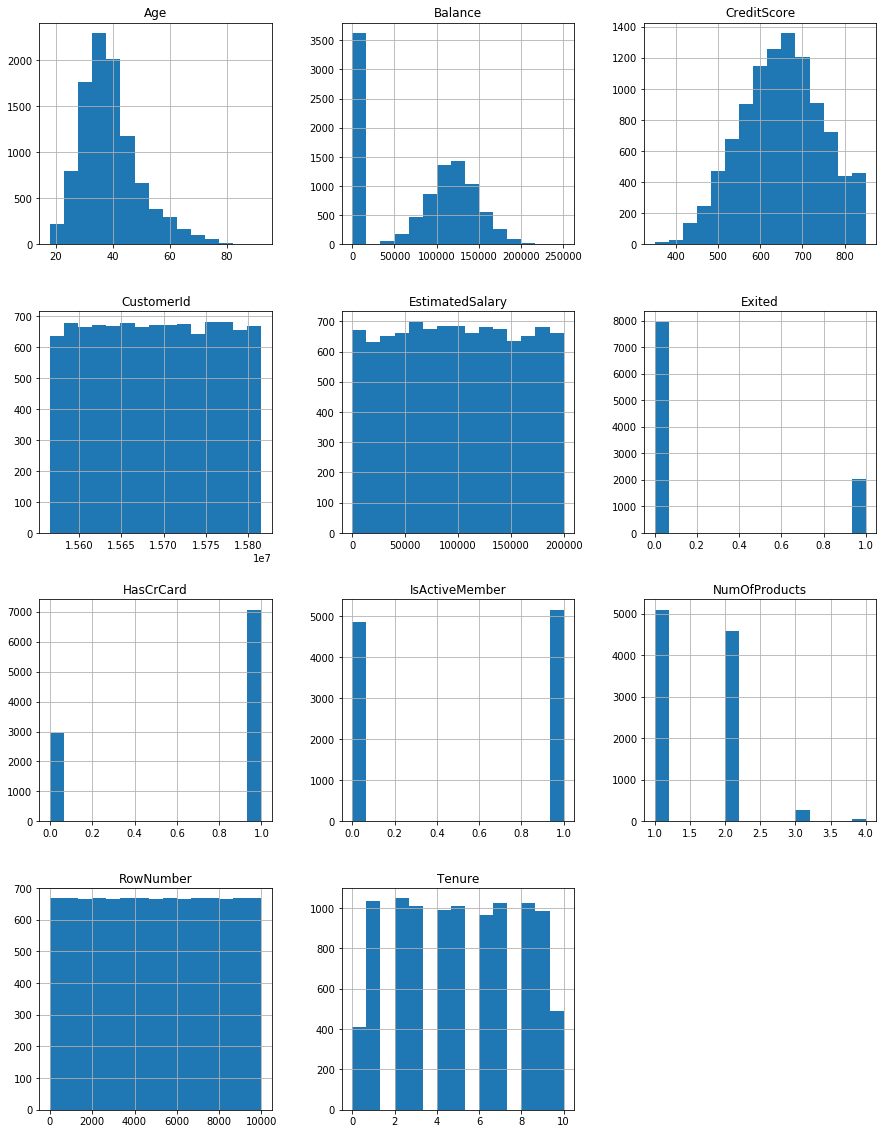

In [0]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax, bins = 15)
plt.show()

## check for null values

In [0]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
df.shape

(10000, 14)

In [0]:
data = df.copy()

In [0]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## remove unwanted columns

In [0]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [0]:
data1 = data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [0]:
data1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Balance has more than 3500 values which are 0.00 , Remove rows whose balance is 3500

In [0]:
data1=data1[data1.Balance != 0.00]

In [0]:
data1.shape

(6383, 11)

## check for outliers

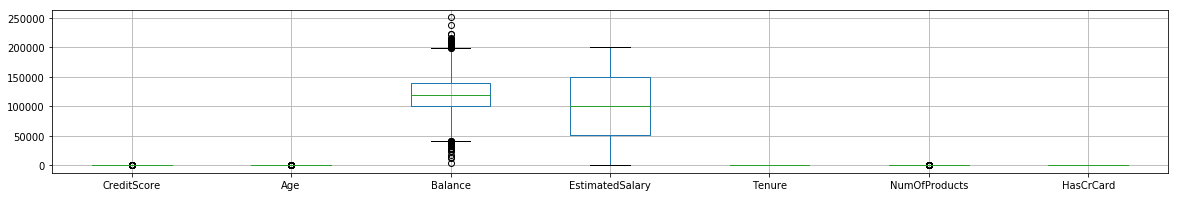

In [0]:
data1[['CreditScore', 'Age', 'Balance', 'EstimatedSalary','Tenure','NumOfProducts','HasCrCard']].boxplot(figsize=(20,3))

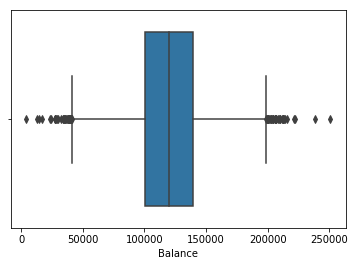

In [0]:
sns.boxplot(x =data1['Balance'])

In [0]:
data2 = data1.copy()

In [0]:
data2 = remove_outlier(data2,'Balance')

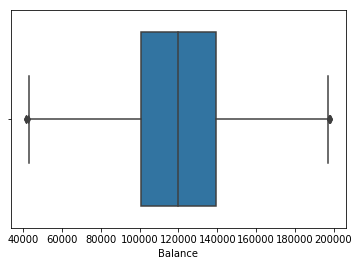

In [0]:
sns.boxplot(x =data2['Balance'])
plt.show()

In [0]:
data2 = remove_outlier(data2,'Balance')

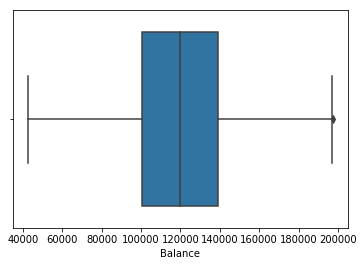

In [0]:
sns.boxplot(x =data2['Balance'])
plt.show()

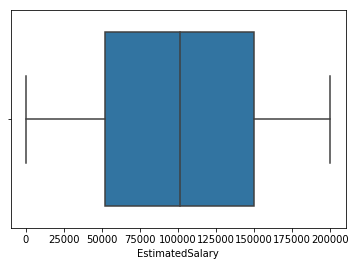

In [0]:
sns.boxplot(x =data1['EstimatedSalary'])
plt.show()

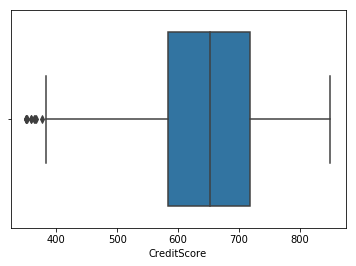

In [0]:
sns.boxplot(x =data1['CreditScore'])
plt.show()

In [0]:
data2 = remove_outlier(data2,'CreditScore')

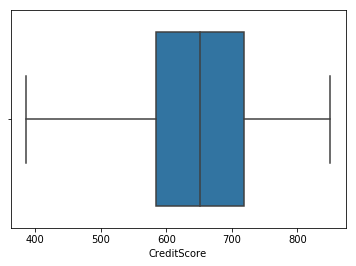

In [0]:
sns.boxplot(x =data2['CreditScore'])
plt.show()

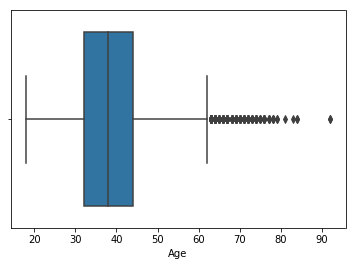

In [0]:
sns.boxplot(x =data1['Age'])
plt.show()

In [0]:
data2 = remove_outlier(data2,'Age')

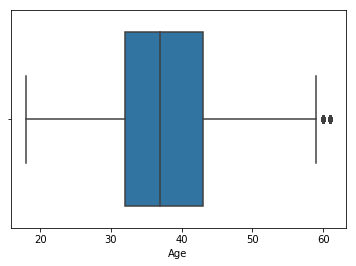

In [0]:
sns.boxplot(x =data2['Age'])
plt.show()

In [0]:
data2 = remove_outlier(data2,'Age')

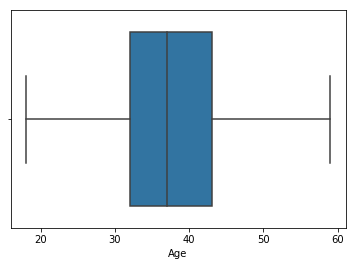

In [0]:
sns.boxplot(x =data2['Age'])
plt.show()

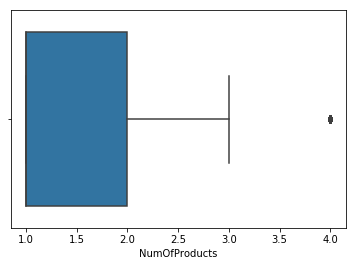

In [0]:
sns.boxplot(x =data1['NumOfProducts'])
plt.show()

In [0]:
data2 = remove_outlier(data2,'NumOfProducts')

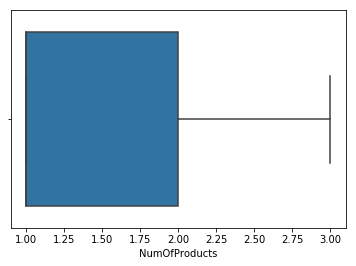

In [0]:
sns.boxplot(x =data2['NumOfProducts'])
plt.show()

In [0]:
data2.shape

(5917, 11)

## one hot encode categorical data

In [0]:
data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [0]:
data2.shape

(5917, 11)

In [0]:
encode_text_dummy(data2,'Geography')

In [0]:
encode_text_dummy(data2,'Gender')

In [0]:
data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography-France,Geography-Germany,Geography-Spain,Gender-Female,Gender-Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1


In [0]:
data2.min()

CreditScore            386.00
Age                     18.00
Tenure                   0.00
Balance              42712.87
NumOfProducts            1.00
HasCrCard                0.00
IsActiveMember           0.00
EstimatedSalary         11.58
Exited                   0.00
Geography-France         0.00
Geography-Germany        0.00
Geography-Spain          0.00
Gender-Female            0.00
Gender-Male              0.00
dtype: float64

In [0]:
data2.max()

CreditScore             850.00
Age                      59.00
Tenure                   10.00
Balance              197200.04
NumOfProducts             3.00
HasCrCard                 1.00
IsActiveMember            1.00
EstimatedSalary      199970.74
Exited                    1.00
Geography-France          1.00
Geography-Germany         1.00
Geography-Spain           1.00
Gender-Female             1.00
Gender-Male               1.00
dtype: float64

## Normalization  data using min max technique

In [0]:
normalData = data2.copy()
for col in ['Age','CreditScore','Balance','EstimatedSalary']:
    normalize_numeric_minmax(normalData, col)

In [0]:
normalData.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography-France,Geography-Germany,Geography-Spain,Gender-Female,Gender-Male
1,0.478448,0.560976,1,0.266009,1,0,1,0.562770,0,0,0,1,1,0
2,0.250000,0.585366,8,0.757007,3,1,0,0.569716,1,1,0,0,1,0
4,1.000000,0.609756,2,0.535954,1,1,1,0.395443,0,0,0,1,1,0
5,0.558190,0.634146,8,0.459863,2,1,0,0.748879,1,0,0,1,0,1
8,0.247845,0.634146,4,0.643019,2,0,1,0.374721,0,1,0,0,0,1


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


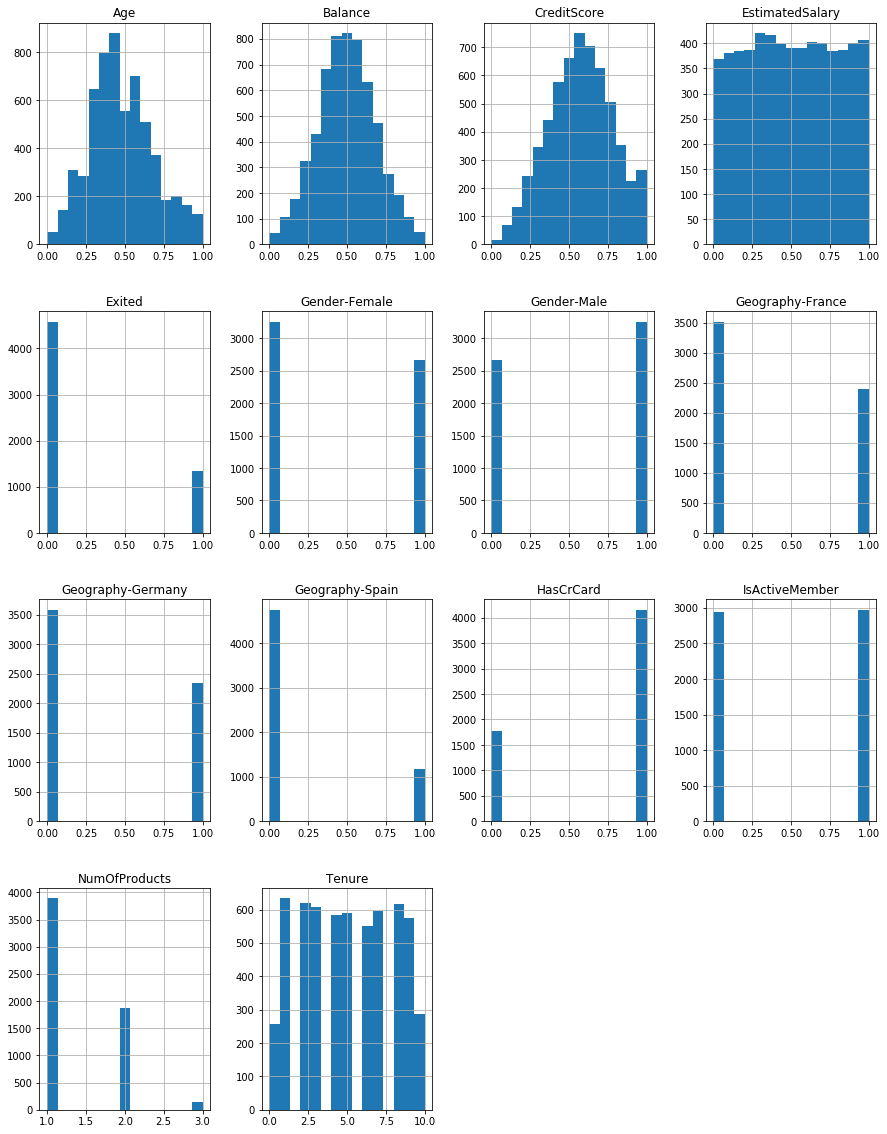

In [0]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
normalData.hist(ax = ax, bins = 15)
plt.show()

## create x and y 

In [0]:
df_output = normalData['Exited'].copy()

In [0]:
df_output.head()

1    0
2    1
4    0
5    1
8    0
Name: Exited, dtype: int64

In [0]:
df_input = normalData.drop(['Exited'],axis = 1)

In [0]:
df_input.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography-France,Geography-Germany,Geography-Spain,Gender-Female,Gender-Male
1,0.478448,0.560976,1,0.266009,1,0,1,0.562770,0,0,1,1,0
2,0.250000,0.585366,8,0.757007,3,1,0,0.569716,1,0,0,1,0
4,1.000000,0.609756,2,0.535954,1,1,1,0.395443,0,0,1,1,0
5,0.558190,0.634146,8,0.459863,2,1,0,0.748879,0,0,1,0,1
8,0.247845,0.634146,4,0.643019,2,0,1,0.374721,1,0,0,0,1


In [0]:
x = df_input.values

In [0]:
y = df_output.values

## Split into training and test sets 




In [0]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [0]:
x_train.shape

(3550, 13)

In [0]:
y_train.shape

(3550,)

In [0]:
x_test.shape

(2367, 13)

In [0]:
y_test.shape

(2367,)

# Naive Bayes Classification

In [0]:
clf_top = GaussianNB()

In [0]:
model_top = clf_top.fit(x_train, y_train)

In [0]:
GaussianNB_pred_top = clf_top.predict(x_test)

In [0]:
from sklearn.metrics import f1_score
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, GaussianNB_pred_top, average='micro'))
score = metrics.accuracy_score(y_test, GaussianNB_pred_top)
print("Accuracy score: {}".format(score))
score1 = metrics.precision_score(y_test,GaussianNB_pred_top, average= "micro")
print("Precision score: {}".format(score1))
score2 = metrics.recall_score(y_test,GaussianNB_pred_top, average= "micro")
print("Recall score: {}".format(score2))

Evaluating with F1 score metric: 0.81
Accuracy score: 0.812843261512463
Precision score: 0.812843261512463
Recall score: 0.812843261512463


[[1704  121]
 [ 322  220]]
Plotting confusion matrix


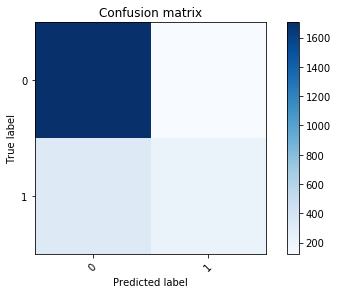

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1825
           1       0.65      0.41      0.50       542

   micro avg       0.81      0.81      0.81      2367
   macro avg       0.74      0.67      0.69      2367
weighted avg       0.80      0.81      0.80      2367



In [0]:
# Compute confusion matrix
cm = confusion_matrix(y_test, GaussianNB_pred_top)
print(cm)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, ['0','1'])
plt.show()

print(classification_report(y_test,GaussianNB_pred_top))

# Nearest Neighbor

In [0]:
knn = KNeighborsClassifier(n_neighbors=7)
print(knn)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


In [0]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_knn, average='micro'))
score = metrics.accuracy_score(y_test, y_pred_knn)
print("Accuracy score: {}".format(score))
score = metrics.precision_score(y_test,y_pred_knn, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y_pred_knn, average= "weighted")
print("Recall score: {}".format(score))

Evaluating with F1 score metric: 0.78
Accuracy score: 0.7777777777777778
Precision score: 0.7424515689071934
Recall score: 0.7777777777777778


[[1717  108]
 [ 418  124]]
Plotting confusion matrix


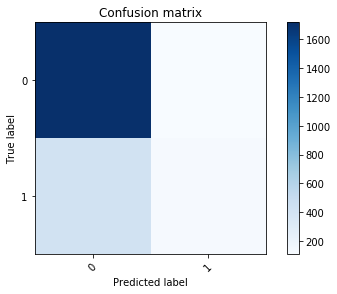

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1825
           1       0.53      0.23      0.32       542

   micro avg       0.78      0.78      0.78      2367
   macro avg       0.67      0.58      0.59      2367
weighted avg       0.74      0.78      0.74      2367



In [0]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, ['0','1'])
plt.show()

print(classification_report(y_test,y_pred_knn))

# Support Vector Machine

In [0]:
model = svm.SVC() 

In [0]:
model.fit(x_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_SVM = model.predict(x_test)

In [0]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, y_pred_SVM, average='micro'))
score = metrics.accuracy_score(y_test, y_pred_SVM)
print("Accuracy score: {}".format(score))
score = metrics.precision_score(y_test,y_pred_SVM, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test,y_pred_SVM, average= "weighted")
print("Recall score: {}".format(score))

Evaluating with F1 score metric: 0.80
Accuracy score: 0.7967891846218842
Precision score: 0.8325209986351068
Recall score: 0.7967891846218842


[[1823    2]
 [ 479   63]]
Plotting confusion matrix


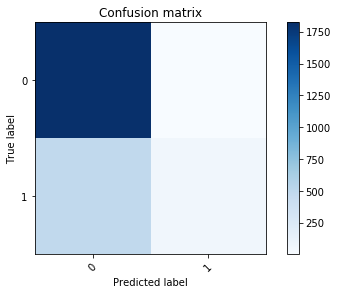

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1825
           1       0.97      0.12      0.21       542

   micro avg       0.80      0.80      0.80      2367
   macro avg       0.88      0.56      0.55      2367
weighted avg       0.83      0.80      0.73      2367



In [0]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, ['0','1'])
plt.show()
print(classification_report(y_test, y_pred_SVM))

# Decision Trees

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(x_train, y_train)

In [0]:
pred = clf.predict(x_test)

In [0]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, pred, average='micro'))
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
score = metrics.precision_score(y_test, pred, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test, pred, average= "weighted")
print("Recall score: {}".format(score))

Evaluating with F1 score metric: 0.80
Accuracy score: 0.8014364174059991
Precision score: 0.7881020198409218
Recall score: 0.8014364174059991


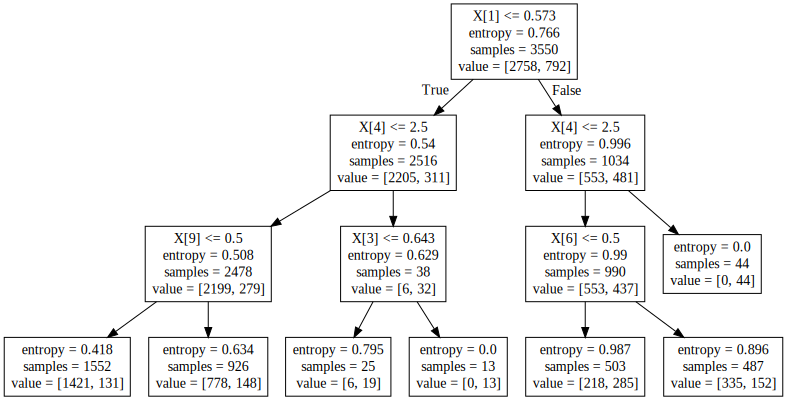

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graphviz.Source(dot_data) 

# Logistic regression

In [0]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y= encode.fit_transform(y)

In [0]:
logreg = linear_model.LogisticRegression()

In [0]:
logreg.fit(x_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred_logistic = logreg.predict(x_test)

In [0]:
print('F1 score metric: %.2f' % f1_score(y_test, y_pred_logistic,average='micro'))
score = metrics.accuracy_score(y_test, y_pred_logistic)
print("Accuracy score: {}".format(score))
score = metrics.recall_score(y_test,y_pred_logistic, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.precision_score(y_test,y_pred_logistic, average= "weighted")
print("Precision score: {}".format(score))

F1 score metric: 0.80
Accuracy score: 0.8035487959442332
Recall score: 0.8035487959442332
Precision score: 0.785133761752263


Plotting confusion matrix


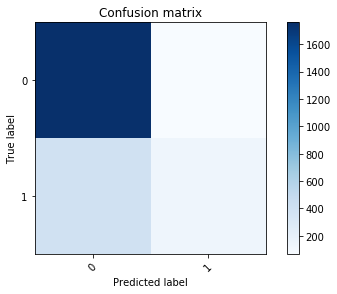

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1825
           1       0.68      0.26      0.38       542

   micro avg       0.80      0.80      0.80      2367
   macro avg       0.75      0.61      0.63      2367
weighted avg       0.79      0.80      0.77      2367



In [0]:
names = (np.unique(y))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, ['0','1'])
plt.show()

print(classification_report(y_test, y_pred_logistic))

# Tensorflow classification

In [0]:
num_classes = 2
#Convert class vectors to one hot format
y_train_c = keras.utils.to_categorical(y_train,num_classes)
print(y_train_c[:1])
y_test_c = keras.utils.to_categorical(y_test,num_classes)
print(x_train.shape)
print(y_train_c.shape)

[[ 1.  0.]]
(3550, 13)
(3550, 2)


In [0]:
model_class = Sequential()
model_class.add(Dense(50, input_dim=x_train.shape[1], activation='relu')) # Hidden 1
model_class.add(Dense(25, activation='relu')) # Hidden 2
model_class.add(Dense(y_train_c.shape[1], activation='softmax')) # Output
model_class.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_class.fit(x_train, y_train_c,validation_data=(x_test,y_test_c),verbose=2,epochs=100)
      

Train on 3550 samples, validate on 2367 samples
Epoch 1/100
 - 0s - loss: 0.5086 - acc: 0.7808 - val_loss: 0.4986 - val_acc: 0.7774
Epoch 2/100
 - 0s - loss: 0.4768 - acc: 0.7862 - val_loss: 0.4755 - val_acc: 0.7841
Epoch 3/100
 - 0s - loss: 0.4563 - acc: 0.8006 - val_loss: 0.4653 - val_acc: 0.7997
Epoch 4/100
 - 0s - loss: 0.4474 - acc: 0.8085 - val_loss: 0.5069 - val_acc: 0.7845
Epoch 5/100
 - 0s - loss: 0.4403 - acc: 0.8085 - val_loss: 0.4479 - val_acc: 0.8103
Epoch 6/100
 - 0s - loss: 0.4322 - acc: 0.8203 - val_loss: 0.4378 - val_acc: 0.8107
Epoch 7/100
 - 0s - loss: 0.4260 - acc: 0.8166 - val_loss: 0.4408 - val_acc: 0.8116
Epoch 8/100
 - 0s - loss: 0.4227 - acc: 0.8214 - val_loss: 0.4350 - val_acc: 0.8116
Epoch 9/100
 - 0s - loss: 0.4223 - acc: 0.8152 - val_loss: 0.4361 - val_acc: 0.8120
Epoch 10/100
 - 0s - loss: 0.4187 - acc: 0.8217 - val_loss: 0.4417 - val_acc: 0.8137
Epoch 11/100
 - 0s - loss: 0.4170 - acc: 0.8225 - val_loss: 0.4323 - val_acc: 0.8137
Epoch 12/100
 - 0s - loss:

Epoch 97/100
 - 0s - loss: 0.3396 - acc: 0.8572 - val_loss: 0.4279 - val_acc: 0.8276
Epoch 98/100
 - 0s - loss: 0.3392 - acc: 0.8594 - val_loss: 0.4276 - val_acc: 0.8196
Epoch 99/100
 - 0s - loss: 0.3399 - acc: 0.8546 - val_loss: 0.4294 - val_acc: 0.8251
Epoch 100/100
 - 0s - loss: 0.3404 - acc: 0.8572 - val_loss: 0.4322 - val_acc: 0.8268


In [0]:
pred_c = model_class.predict(x_test)
pred_c = np.argmax(pred_c,axis=1) 

In [0]:
y_true= np.argmax(y_test_c,axis=1) 
score_c = metrics.accuracy_score(y_true, pred_c)
print("Accuracy score: {}".format(score_c))

score_tf_precision_stopping = metrics.precision_score(y_true, pred_c, average= "weighted")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_true, pred_c, average= "weighted")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_true, pred_c, average= "weighted")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.8267849598648078
Precision score: 0.8139407390084449
Recall score: 0.8267849598648078
F1 score: 0.8083776174699343


# feature importances

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


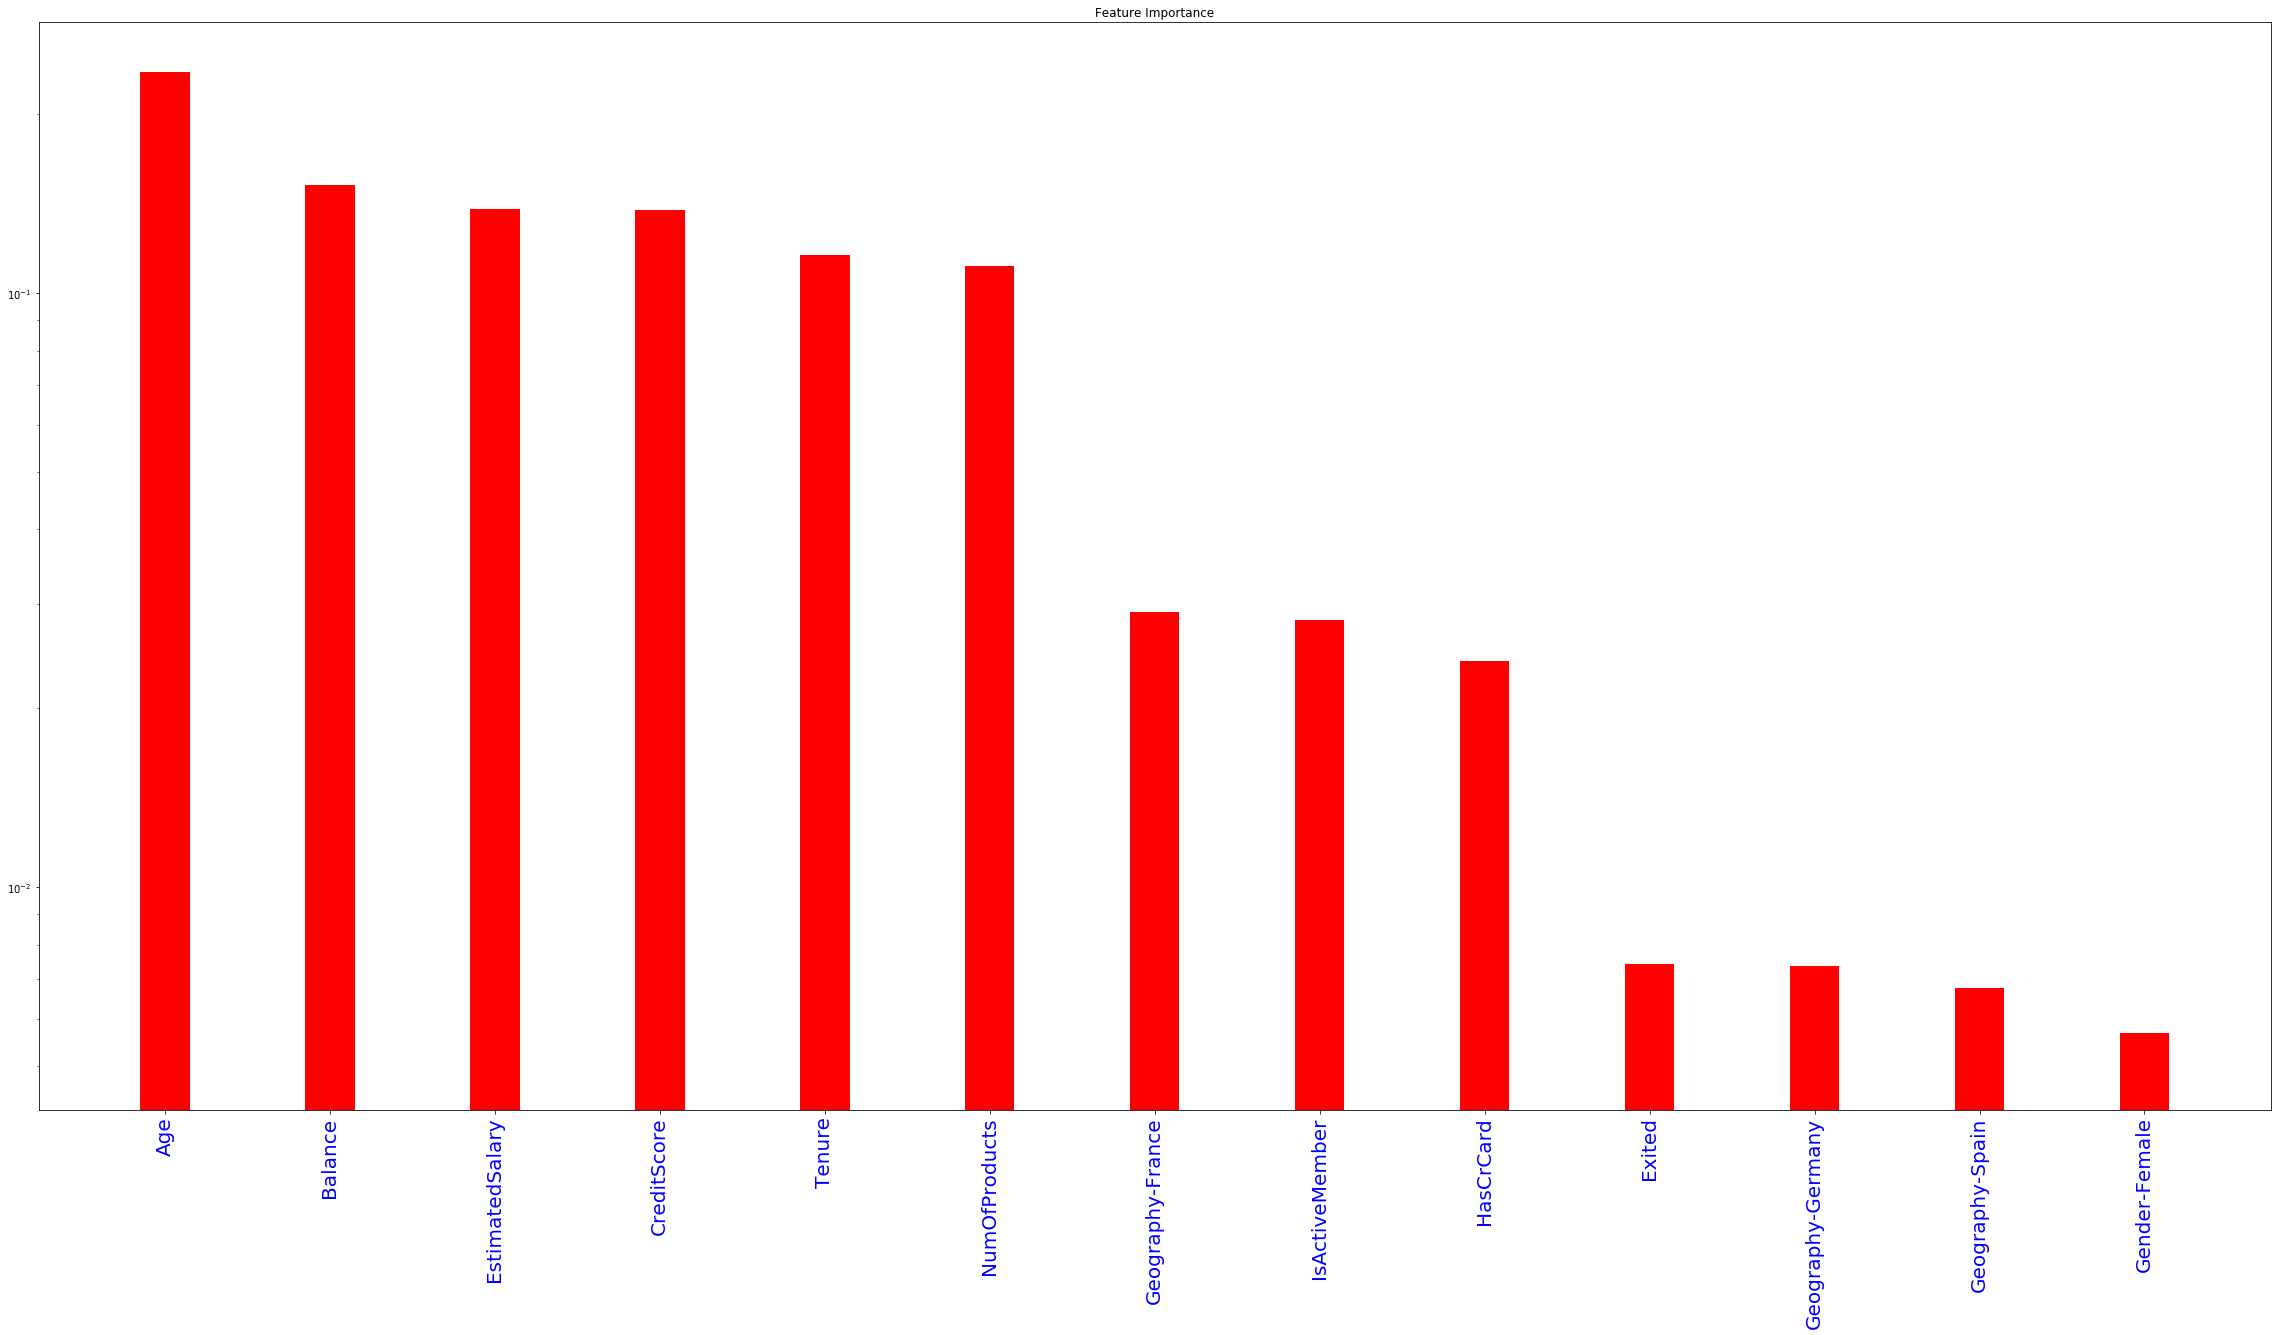

In [0]:
# Create decision tree classifer object
clf =  ExtraTreesClassifier()
# Train model
model = clf.fit(x, y)

# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [normalData.columns[i] for i in indices]
plt.figure(figsize=(40, 20))
plt.yscale('log', nonposy='clip')
# Barplot: Add bars
plt.bar(range(x.shape[1]), importances[indices],align='center',color='r',width=0.3)
#ax.bar(x-0.2, y,width=0.2,color='b',align='center')
# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, fontsize = 20,color='b', rotation='vertical')
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

# choosing top 3 features

In [0]:
new_dataset = normalData[['Age','Balance','EstimatedSalary','Exited']].copy()

In [0]:
new_dataset.head()

,Age,Balance,EstimatedSalary,Exited
1,0.560976,0.266009,0.562770,0
2,0.585366,0.757007,0.569716,1
4,0.609756,0.535954,0.395443,0
5,0.634146,0.459863,0.748879,1
8,0.634146,0.643019,0.374721,0


In [0]:
df_output1 = new_dataset['Exited'].copy()

In [0]:
df_output1.head()

1    0
2    1
4    0
5    1
8    0
Name: Exited, dtype: int64

In [0]:
df_input1 = new_dataset.drop(['Exited'],axis = 1)

In [0]:
df_input1.head()

,Age,Balance,EstimatedSalary
1,0.560976,0.266009,0.562770
2,0.585366,0.757007,0.569716
4,0.609756,0.535954,0.395443
5,0.634146,0.459863,0.748879
8,0.634146,0.643019,0.374721


In [0]:
x1 = df_input1.values

In [0]:
y1 = df_output1.values

## Split into training and test sets 




In [0]:
# Split into training and test sets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [0]:
x_train1.shape

(4733, 3)

In [0]:
y_train1.shape

(4733,)

In [0]:
x_test1.shape

(1184, 3)

In [0]:
y_test1.shape

(1184,)

## tesnorflow classification

In [0]:
num_classes = 2
#Convert class vectors to one hot format
y_train_1 = keras.utils.to_categorical(y_train1,num_classes)
print(y_train_1[:1])
y_test_1 = keras.utils.to_categorical(y_test1,num_classes)
print(x_train1.shape)
print(y_train_1.shape)

[[ 1.  0.]]
(4733, 3)
(4733, 2)


In [0]:
checkpointer = ModelCheckpoint(filepath="best_weights_class.hdf5", verbose=0, save_best_only=True) # save best model
for i in range(4):
    model_class = Sequential()
    model_class.add(Dense(64, input_dim=x_train1.shape[1], activation='relu')) # Hidden 1
    model_class.add(Dense(32, activation='relu')) # Hidden 2
    model_class.add(Dense(y_train_1.shape[1], activation='softmax')) # Output
    model_class.compile(optimizer = 'adam' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=2, verbose=2, mode='auto') 
    
    model_class.fit(x_train1, y_train_1,validation_data=(x_test1,y_test_1),callbacks=[monitor,checkpointer],verbose=2,epochs=50)
      

Train on 4733 samples, validate on 1184 samples
Epoch 1/50
 - 0s - loss: 0.5450 - acc: 0.7577 - val_loss: 0.4949 - val_acc: 0.7779
Epoch 2/50
 - 0s - loss: 0.4846 - acc: 0.7798 - val_loss: 0.4726 - val_acc: 0.7872
Epoch 3/50
 - 0s - loss: 0.4705 - acc: 0.7870 - val_loss: 0.4659 - val_acc: 0.7855
Epoch 4/50
 - 0s - loss: 0.4663 - acc: 0.7925 - val_loss: 0.4643 - val_acc: 0.7846
Epoch 5/50
 - 0s - loss: 0.4654 - acc: 0.7900 - val_loss: 0.4634 - val_acc: 0.7855
Epoch 6/50
 - 0s - loss: 0.4654 - acc: 0.7885 - val_loss: 0.4635 - val_acc: 0.7880
Epoch 00006: early stopping
Train on 4733 samples, validate on 1184 samples
Epoch 1/50
 - 0s - loss: 0.5444 - acc: 0.7718 - val_loss: 0.5007 - val_acc: 0.7779
Epoch 2/50
 - 0s - loss: 0.4892 - acc: 0.7767 - val_loss: 0.4776 - val_acc: 0.7779
Epoch 3/50
 - 0s - loss: 0.4731 - acc: 0.7860 - val_loss: 0.4716 - val_acc: 0.7846
Epoch 4/50
 - 0s - loss: 0.4671 - acc: 0.7891 - val_loss: 0.4655 - val_acc: 0.7880
Epoch 5/50
 - 0s - loss: 0.4653 - acc: 0.7927 

In [0]:
pred_1 = model_class.predict(x_test1)
pred_1 = np.argmax(pred_1,axis=1) 

In [0]:
y_true= np.argmax(y_test_1,axis=1) 
score_c = metrics.accuracy_score(y_true, pred_1)
print("Accuracy score: {}".format(score_c))

score_tf_precision_stopping = metrics.precision_score(y_true, pred_1, average= "micro")
print("Precision score: {}".format(score_tf_precision_stopping))


score_tf_recall_stopping = metrics.recall_score(y_true, pred_1, average= "micro")
print("Recall score: {}".format(score_tf_recall_stopping))


score_tf_f1_stopping = metrics.f1_score(y_true, pred_1, average= "micro")
print("F1 score: {}".format(score_tf_f1_stopping))

Accuracy score: 0.7913851351351351
Precision score: 0.7913851351351351
Recall score: 0.7913851351351351
F1 score: 0.7913851351351351


# Oversampling

In [0]:
balance_data = normalData.copy()

In [0]:
balance_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography-France,Geography-Germany,Geography-Spain,Gender-Female,Gender-Male
1,0.478448,0.560976,1,0.266009,1,0,1,0.562770,0,0,0,1,1,0
2,0.250000,0.585366,8,0.757007,3,1,0,0.569716,1,1,0,0,1,0
4,1.000000,0.609756,2,0.535954,1,1,1,0.395443,0,0,0,1,1,0
5,0.558190,0.634146,8,0.459863,2,1,0,0.748879,1,0,0,1,0,1
8,0.247845,0.634146,4,0.643019,2,0,1,0.374721,0,1,0,0,0,1


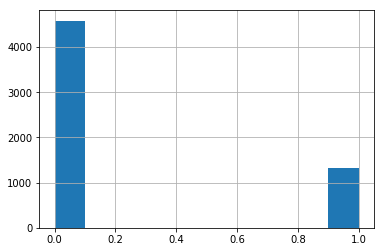

In [0]:
balance_data.Exited.hist()

In [0]:
x_train.shape

(3550, 13)

In [0]:
print(sorted(collections.Counter(y_train).items()))

[(0, 2758), (1, 792)]


In [0]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(x_train, y_train)
#clf_smote = LinearSVC().fit(X_resampled, y_resampled)
print(sorted(collections.Counter(y_resampled).items()))

[(0, 2758), (1, 2758)]


In [0]:
X_resampled.shape

(5516, 13)

In [0]:
y_resampled.shape

(5516,)

# Logistic regression

In [0]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y= encode.fit_transform(y)

In [0]:
logreg = linear_model.LogisticRegression()

In [0]:
logreg.fit(X_resampled, y_resampled)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred_logistic = logreg.predict(x_test)

In [0]:
print('F1 score metric: %.2f' % f1_score(y_test, y_pred_logistic,average='weighted'))
score = metrics.accuracy_score(y_test, y_pred_logistic)
print("Accuracy score: {}".format(score))
score = metrics.recall_score(y_test,y_pred_logistic, average= "weighted")
print("Recall score: {}".format(score))
score = metrics.precision_score(y_test,y_pred_logistic, average= "weighted")
print("Precision score: {}".format(score))

F1 score metric: 0.75
Accuracy score: 0.728348119983101
Recall score: 0.728348119983101
Precision score: 0.7891404645702488


Plotting confusion matrix


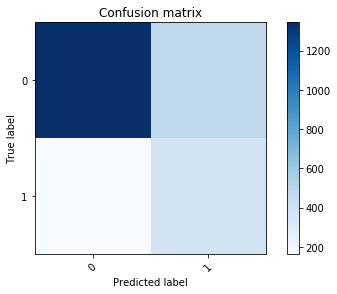

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1825
           1       0.44      0.70      0.54       542

   micro avg       0.73      0.73      0.73      2367
   macro avg       0.67      0.72      0.67      2367
weighted avg       0.79      0.73      0.75      2367



In [0]:
names = (np.unique(y))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_logistic)
print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm, ['0','1'])
plt.show()

print(classification_report(y_test, y_pred_logistic))

# Decision Trees

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X_resampled, y_resampled)

In [0]:
pred = clf.predict(x_test)

In [0]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, pred, average='weighted'))
score = metrics.accuracy_score(y_test, pred)
print("Accuracy score: {}".format(score))
score = metrics.precision_score(y_test, pred, average= "weighted")
print("Precision score: {}".format(score))
score = metrics.recall_score(y_test, pred, average= "weighted")
print("Recall score: {}".format(score))

Evaluating with F1 score metric: 0.76
Accuracy score: 0.7465145754119138
Precision score: 0.7839695885186541
Recall score: 0.7465145754119138
